### In this exercise, we'll continue working with the titanic dataset and building logistic regression models. Througout this exercise, be sure you are training, evaluation, and comparing models on the train and validate dataset. The test dataset should be only used for your final model. 

### For all of the models you create, choose a threshold that optimizes for accuracy. 

### Do your work for these exercises in either a notebook or a python script named model within your classification-exercises repository. Add, commit, and push your work.

**Takeways**:
1. Build logistic regression models for titanic dataset.
2. Several models need to be build. 
3. Accuray is the evaluation metrics. 
4. Target varibale: the survivied (categorical)
5. The positive case is predicting the survivied
    - TP: predicting survived actually survivied
    - FP: predicting survived actually being a victim
    - TN: predicting being a victim acturally was a victim
    - FN: predicting being a victim acturally survived

In [82]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### 1. Create another model that includes age in addition to fare and pclass. Does this model perform better than your previous one? 

In [83]:
# Acquire titanic data.

titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [84]:
# Prepare titanic dataset

train, validate, test = prepare.prep_titanic(titanic)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S
583,583,0,1,male,36.0,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.0,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.0,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.0,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,24.0,1,0,146.5208,C,First,Cherbourg,0,0,0


In [85]:
train.shape, validate.shape, test.shape

((497, 14), (214, 14), (178, 14))

In [86]:
# Double check if there is any missing values

train.isnull().sum()

passenger_id    0
survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
embark_town     0
alone           0
embarked_Q      0
embarked_S      0
dtype: int64

In [87]:
# Establish the baseline

train.survived.value_counts()

0    307
1    190
Name: survived, dtype: int64

In [88]:
# Compute baseline accuracy: (TP + TN) / All

190 /(190+307)

0.3822937625754527

### Model 1: X = ['fare', 'pclass'], y = 'survived'
1. fare: continuous
2. pclass: categotical

In [89]:
# fare and pclass are the X in model1.

X_train_model1 = train[['fare', 'pclass']]
y_train_model1 = train[['survived']]

X_train_model1.shape, y_train_model1.shape

((497, 2), (497, 1))

In [90]:
# Create the logistic regression object

logit1 = LogisticRegression(C=1)

# Fit the model to the training data

logit1.fit(X_train_model1, y_train_model1)

# Print the coefficients and intercept of the model

print('Coefficient: \n', logit1.coef_)
print('Intercept: \n', logit1.intercept_)

Coefficient: 
 [[ 0.00391168 -0.74992231]]
Intercept: 
 [1.06417548]


In [92]:
# Estimate whether or not a passenger would survive, using the training data

y_pred_model1 = logit1.predict(X_train_model1)
y_pred_model1

# Estimate the probablity of a passenger surviving, using the training data
y_pred_proba_model1 = logit1.predict_proba(X_train_model1)

**Evalute model on train**

In [93]:
# Compute the accuracy

print(logit1.score(X_train_model1, y_train_model1))

# Create a confusion matrix

print(confusion_matrix(y_train_model1, y_pred_model1))

# Compute Precision, Recall, F1-score, and Support

print(classification_report(y_train_model1, y_pred_model1))

0.682092555331992
[[261  46]
 [112  78]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       307
           1       0.63      0.41      0.50       190

    accuracy                           0.68       497
   macro avg       0.66      0.63      0.63       497
weighted avg       0.67      0.68      0.66       497



### Model 2: X = ['fare', 'pclass', 'age'], y = 'survived'

In [94]:
# fare, pclass, age are the X in model2.

X_train_model2 = train[['fare', 'pclass', 'age']]
y_train_model2 = train[['survived']]

X_train_model2.shape, y_train_model2.shape

((497, 3), (497, 1))

**Create, Fit & Predict**

In [98]:
# Create the logistic regression object

logit2 = LogisticRegression(C=1)

# Fit the model to the training data

logit2.fit(X_train_model2, y_train_model2)

# Print the coefficients and intercept of the model

print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

# Estimate whether or not a passenger would survive, using the training data

y_pred_model2 = logit2.predict(X_train_model2)
y_pred_model2

# Estimate the probablity of a passenger surviving, using the training data
y_pred_proba_model2 = logit2.predict_proba(X_train_model2)

Coefficient: 
 [[ 0.00276706 -0.97541889 -0.02864116]]
Intercept: 
 [2.42980594]


**Evalute model on train**

In [99]:
# Compute the accuracy

print('Accuracy: {: .2f}'.format(logit2.score(X_train_model2, y_train_model2)))

# Create a confusion matrix

print('Confusion matrix: \n', confusion_matrix(y_train_model2, y_pred_model2))

# Compute Precision, Recall, F1-score, and Support

print(classification_report(y_train_model2, y_pred_model2))

Accuracy:  0.72
Confusion matrix: 
 [[268  39]
 [102  88]]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       307
           1       0.69      0.46      0.56       190

    accuracy                           0.72       497
   macro avg       0.71      0.67      0.67       497
weighted avg       0.71      0.72      0.70       497



### 2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [101]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S
583,583,0,1,male,36.0,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.0,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.0,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.0,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,24.0,1,0,146.5208,C,First,Cherbourg,0,0,0


In [102]:
sex_dummy = pd.get_dummies(train.sex)
train = pd.concat([train, sex_dummy], axis=1)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S,female,male
583,583,0,1,male,36.0,0,0,40.1250,C,First,Cherbourg,1,0,0,0,1
337,337,1,1,female,41.0,0,0,134.5000,C,First,Cherbourg,1,0,0,1,0
50,50,0,3,male,7.0,4,1,39.6875,S,Third,Southampton,0,0,1,0,1
218,218,1,1,female,32.0,0,0,76.2917,C,First,Cherbourg,1,0,0,1,0
31,31,1,1,female,24.0,1,0,146.5208,C,First,Cherbourg,0,0,0,1,0


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 583 to 553
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  497 non-null    int64  
 1   survived      497 non-null    int64  
 2   pclass        497 non-null    int64  
 3   sex           497 non-null    object 
 4   age           497 non-null    float64
 5   sibsp         497 non-null    int64  
 6   parch         497 non-null    int64  
 7   fare          497 non-null    float64
 8   embarked      497 non-null    object 
 9   class         497 non-null    object 
 10  embark_town   497 non-null    object 
 11  alone         497 non-null    int64  
 12  embarked_Q    497 non-null    uint8  
 13  embarked_S    497 non-null    uint8  
 14  female        497 non-null    uint8  
 15  male          497 non-null    uint8  
dtypes: float64(2), int64(6), object(4), uint8(4)
memory usage: 52.4+ KB


### Model 3: X = ['fare', 'pclass', 'age', 'male'], y = ['survivied']

In [104]:
# fare, pclass, age, and male are the X in model2.

X_train_model3 = train[['fare', 'pclass', 'age', 'male']]
y_train_model3 = train[['survived']]

X_train_model3.shape, y_train_model3.shape

((497, 4), (497, 1))

In [105]:
# Create the logistic regression object

logit3 = LogisticRegression(C=1)

# Fit the model to the training data

logit3.fit(X_train_model3, y_train_model3)

# Print the coefficients and intercept of the model

print('Coefficient: \n', logit3.coef_)
print('Intercept: \n', logit3.intercept_)

# Estimate whether or not a passenger would survive, using the training data

y_pred_model3 = logit3.predict(X_train_model3)
y_pred_model3

# Estimate the probablity of a passenger surviving, using the training data
y_pred_proba_model3 = logit3.predict_proba(X_train_model3)

Coefficient: 
 [[ 9.90901614e-04 -1.11080403e+00 -2.51556288e-02 -2.46196700e+00]]
Intercept: 
 [4.22516921]


In [106]:
# Compute the accuracy

print('Accuracy: {: .2f}'.format(logit3.score(X_train_model3, y_train_model3)))

# Create a confusion matrix

print('Confusion matrix: ', confusion_matrix(y_train_model3, y_pred_model3))

# Compute Precision, Recall, F1-score, and Support

print(classification_report(y_train_model3, y_pred_model3))

Accuracy:  0.79
Confusion matrix:  [[256  51]
 [ 53 137]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.73      0.72      0.72       190

    accuracy                           0.79       497
   macro avg       0.78      0.78      0.78       497
weighted avg       0.79      0.79      0.79       497



**Notes**
1. Previous model only contains fare and pclass as the X. 
2. No missing values in the train dataset. 

### 3. Try out other combinations of features and models.
* Model 4: X = ['pcalss', 'male'], y = 'survived'
* Create, fit and predict
* Accuracy, Confustion matrix, and Report

In [107]:
# pclass and male are the X in model 4.

X_train_model4 = train[['pclass', 'male']]
y_train_model4 = train[['survived']]

# Create the logistic regression object

logit4 = LogisticRegression(C=1)

# Fit the model to the training data

logit4.fit(X_train_model4, y_train_model4)

# Print the coefficients and intercept of the model

print('Coefficient: \n', logit4.coef_)
print('Intercept: \n', logit4.intercept_)

# Estimate whether or not a passenger would survive, using the training data

y_pred_model4 = logit4.predict(X_train_model4)
y_pred_model4

# Estimate the probablity of a passenger surviving, using the training data
y_pred_proba_model4 = logit4.predict_proba(X_train_model4)

Coefficient: 
 [[-0.97482197 -2.49903514]]
Intercept: 
 [3.25654772]


In [108]:
# Compute the accuracy

print('Accuracy: {: .2f}'.format(logit4.score(X_train_model4, y_train_model4)))

# Create a confusion matrix

print('Confusion matrix: \n', confusion_matrix(y_train_model4, y_pred_model4))

# Compute Precision, Recall, F1-score, and Support

print(classification_report(y_train_model4, y_pred_model4))

Accuracy:  0.78
Confusion matrix: 
 [[265  42]
 [ 65 125]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       307
           1       0.75      0.66      0.70       190

    accuracy                           0.78       497
   macro avg       0.78      0.76      0.77       497
weighted avg       0.78      0.78      0.78       497



### 4. Use best 3 models to predict and evaluate your validate sample
* Best 3: model 2, 3, 4

In [109]:
# Load validate dataset

validate.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S
610,610,0,3,female,39.0,1,5,31.2750,S,Third,Southampton,0,0,1
424,424,0,3,male,18.0,1,1,20.2125,S,Third,Southampton,0,0,1
568,568,0,3,male,24.0,0,0,7.2292,C,Third,Cherbourg,1,0,0
701,701,1,1,male,35.0,0,0,26.2875,S,First,Southampton,1,0,1
101,101,0,3,male,24.0,0,0,7.8958,S,Third,Southampton,1,0,1


In [110]:
sex_dummy = pd.get_dummies(validate.sex)
validate = pd.concat([validate, sex_dummy], axis=1)
validate.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S,female,male
610,610,0,3,female,39.0,1,5,31.2750,S,Third,Southampton,0,0,1,1,0
424,424,0,3,male,18.0,1,1,20.2125,S,Third,Southampton,0,0,1,0,1
568,568,0,3,male,24.0,0,0,7.2292,C,Third,Cherbourg,1,0,0,0,1
701,701,1,1,male,35.0,0,0,26.2875,S,First,Southampton,1,0,1,0,1
101,101,0,3,male,24.0,0,0,7.8958,S,Third,Southampton,1,0,1,0,1


In [111]:
validate.shape

(214, 16)

In [112]:
# Load validate dataset for Model 2

X_validate_model2 = validate[['fare', 'pclass', 'age']]
y_validate_model2 = validate[['survived']]

# Estimate whether or not a passenger would survive, using the training data

y_pred_model2 = logit2.predict(X_validate_model2)
y_pred_model2

# Estimate the probablity of a passenger surviving, using the training data
y_pred_proba_model2 = logit2.predict_proba(X_validate_model2)

# Compute the accuracy

print('Accuracy: {: .2f}'.format(logit2.score(X_validate_model2, y_validate_model2)))

# Create a confusion matrix

print(confusion_matrix(y_validate_model2, y_pred_model2))

# Compute Precision, Recall, F1-score, and Support

print(classification_report(y_validate_model2, y_pred_model2))

Accuracy:  0.74
[[119  13]
 [ 42  40]]
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       132
           1       0.75      0.49      0.59        82

    accuracy                           0.74       214
   macro avg       0.75      0.69      0.70       214
weighted avg       0.75      0.74      0.73       214



In [113]:
# Load validate dataset for Model 3

X_validate_model3 = validate[['fare', 'pclass', 'age', 'male']]
y_validate_model3 = validate[['survived']]

# Estimate whether or not a passenger would survive, using the training data

y_pred_model3 = logit3.predict(X_validate_model3)
y_pred_model3

# Estimate the probablity of a passenger surviving, using the training data
y_pred_proba_model3 = logit3.predict_proba(X_validate_model3)

# Compute the accuracy

print('Accuracy: {: .2f}'.format(logit3.score(X_validate_model3, y_validate_model3)))

# Create a confusion matrix

print(confusion_matrix(y_validate_model3, y_pred_model3))

# Compute Precision, Recall, F1-score, and Support

print(classification_report(y_validate_model3, y_pred_model3))

Accuracy:  0.78
[[110  22]
 [ 25  57]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       132
           1       0.72      0.70      0.71        82

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.77       214
weighted avg       0.78      0.78      0.78       214



In [114]:
# Load validate dataset for Model 4

X_validate_model4 = validate[['pclass', 'male']]
y_validate_model4 = validate[['survived']]

# Estimate whether or not a passenger would survive, using the training data

y_pred_model4 = logit4.predict(X_validate_model4)
y_pred_model4

# Estimate the probablity of a passenger surviving, using the training data
y_pred_proba_model4 = logit4.predict_proba(X_validate_model4)

# Compute the accuracy

print('Accuracy: {: .2f}'.format(logit4.score(X_validate_model4, y_validate_model4)))

# Create a confusion matrix

print(confusion_matrix(y_validate_model4, y_pred_model4))

# Compute Precision, Recall, F1-score, and Support

print(classification_report(y_validate_model4, y_pred_model4))

Accuracy:  0.77
[[109  23]
 [ 27  55]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       132
           1       0.71      0.67      0.69        82

    accuracy                           0.77       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.77      0.77       214



### 5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?
* Best model from the validation: Model 3

In [115]:
test.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S
561,561,0,3,male,40.0,0,0,7.8958,S,Third,Southampton,1,0,1
328,328,1,3,female,31.0,1,1,20.5250,S,Third,Southampton,0,0,1
643,643,1,3,male,24.0,0,0,56.4958,S,Third,Southampton,1,0,1
498,498,0,1,female,25.0,1,2,151.5500,S,First,Southampton,0,0,1
875,875,1,3,female,15.0,0,0,7.2250,C,Third,Cherbourg,1,0,0


In [116]:
test.shape

(178, 14)

In [117]:
sex_dummy = pd.get_dummies(test.sex)
test = pd.concat([test, sex_dummy], axis=1)
test.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S,female,male
561,561,0,3,male,40.0,0,0,7.8958,S,Third,Southampton,1,0,1,0,1
328,328,1,3,female,31.0,1,1,20.5250,S,Third,Southampton,0,0,1,1,0
643,643,1,3,male,24.0,0,0,56.4958,S,Third,Southampton,1,0,1,0,1
498,498,0,1,female,25.0,1,2,151.5500,S,First,Southampton,0,0,1,1,0
875,875,1,3,female,15.0,0,0,7.2250,C,Third,Cherbourg,1,0,0,1,0


In [118]:
# Load test dataset for Model 3

X_test_model3 = test[['fare', 'pclass', 'age', 'male']]
y_test_model3 = test[['survived']]

# Estimate whether or not a passenger would survive, using the training data

y_pred_model3 = logit3.predict(X_test_model3)
y_pred_model3

# Estimate the probablity of a passenger surviving, using the training data
y_pred_proba_model3 = logit3.predict_proba(X_test_model3)

# Compute the accuracy

print('Accuracy: {: .2f}'.format(logit3.score(X_test_model3, y_test_model3)))

# Create a confusion matrix

print(confusion_matrix(y_test_model3, y_pred_model3))

# Compute Precision, Recall, F1-score, and Support

print(classification_report(y_test_model3, y_pred_model3))

Accuracy:  0.80
[[89 21]
 [15 53]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       110
           1       0.72      0.78      0.75        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



**Notes**: The accuracy from test dataset(0.80) is a little better than the validate(0.78) and train(0.79).

### Bonus 1. How do different strategies for handling the missing values in the age column affect model performance? 

**Notes**
1. In the current titanic dataset, the stragegy for handling the missing values in the age column is SimpleImpute = 'most_frequent')
2. There are four strategies in the SimpleImpute:
    - mean
    - median
    - most_frequent
    - constant
3. The best model for now is Model 3

**My Plan**

1. I will use a different strategy in SimpleImpute and then compare the performance for model 3. 
2. Which stragegy I am gonna use? mean or median. 

In [119]:
raw_titanic = acquire.get_titanic_data()
raw_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [120]:
# age columns has 177 null values

null_age = raw_titanic.age.isnull().sum()
null_age

177

In [121]:
# The percentage of null values in age column

null_age/raw_titanic.age.size

0.19865319865319866

In [122]:
# Most frequent age

# raw_titanic.age.value_counts().head(1)
raw_titanic.age.mode()

0    24.0
dtype: float64

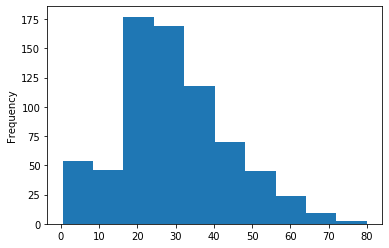

In [123]:
raw_titanic.age.plot.hist()

In [124]:
raw_titanic.age.agg(['mean', 'median'])

mean      29.699118
median    28.000000
Name: age, dtype: float64

In [125]:
# Who are missing the age values?

mask = raw_titanic.age.isnull()
raw_titanic[mask].alone.value_counts()

1    133
0     44
Name: alone, dtype: int64

In [126]:
raw_titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [127]:
train, validate, test = prepare.prep_titanic_mean(raw_titanic)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0


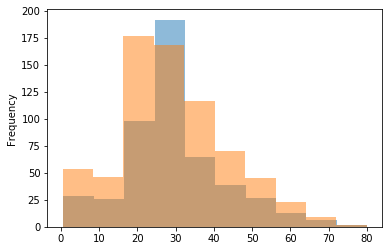

In [128]:
# Visualization of age distrubtion after replacing the missing values with mean. 

train.age.plot.hist(alpha=0.5)
raw_titanic.age.plot.hist(alpha=0.5)

In [129]:
train.shape, validate.shape, test.shape

((497, 14), (214, 14), (178, 14))

In [130]:
# Create dummy variables of sex in train dataset. 

sex_dummy = pd.get_dummies(train.sex)
train = pd.concat([train, sex_dummy], axis=1)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S,female,male
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,0,1
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,1,0
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,0,1
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,1,0
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,1,0


In [131]:
# fare, pclass, age, and male are the X in model 3. 

X_train_model3 = train[['fare', 'pclass', 'age', 'male']]
y_train_model3 = train[['survived']]

X_train_model3.shape, y_train_model3.shape

((497, 4), (497, 1))

In [132]:
# Create the logistic regression object

logit3 = LogisticRegression(C=1)

# Fit the model to the training data

logit3.fit(X_train_model3, y_train_model3)

# Print the coefficients and intercept of the model

print('Coefficient: \n', logit3.coef_)
print('Intercept: \n', logit3.intercept_)

# Estimate whether or not a passenger would survive, using the training data

y_pred_model3 = logit3.predict(X_train_model3)
y_pred_model3

# Estimate the probablity of a passenger surviving, using the training data
y_pred_proba_model3 = logit3.predict_proba(X_train_model3)

Coefficient: 
 [[ 9.02716903e-04 -1.11402368e+00 -2.66594879e-02 -2.45878213e+00]]
Intercept: 
 [4.30664987]


In [133]:
# Compute the accuracy

print('Accuracy: {: .2f}'.format(logit3.score(X_train_model3, y_train_model3)))

# Create a confusion matrix

print('Confusion matrix: \n', confusion_matrix(y_train_model3, y_pred_model3))

# Compute Precision, Recall, F1-score, and Support

print(classification_report(y_train_model3, y_pred_model3))

Accuracy:  0.80
Confusion matrix: 
 [[263  44]
 [ 56 134]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       307
           1       0.75      0.71      0.73       190

    accuracy                           0.80       497
   macro avg       0.79      0.78      0.78       497
weighted avg       0.80      0.80      0.80       497



**Notes**
1. Age columns has 177 null values, about ~20% of all data. 
2. Most frequence age is 24. 
3. The mean age is 29.7.
4. The median age is 28.0.
5. Among whom are missing the age values, 133 are alone, and 44 had accompaniers. 

**Choice**
1. I am gonna use mean as the alternative strategy. Let's see how it affect the performance. 

**Results**
1. The accuracy is increased slightly from 0.79 to 0.80. 
2. Since the coefficient of age is small (0.027), it doesn't weigh that much in the model, which may explain the reason for such small change in accuracy. 

### Bonus 2: How do different strategies for encoding sex affect model performance.

In [144]:
# Acquire titianic dataset. 

titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [145]:
# Prepare titianic dataset

train, validate, test = prepare.prep_titanic(titanic)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S
583,583,0,1,male,36.0,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.0,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.0,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.0,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,24.0,1,0,146.5208,C,First,Cherbourg,0,0,0


In [146]:
# Create dummy variables for column sex

sex_dummy = pd.get_dummies(train.sex)
train = pd.concat([train, sex_dummy], axis=1)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S,female,male
583,583,0,1,male,36.0,0,0,40.1250,C,First,Cherbourg,1,0,0,0,1
337,337,1,1,female,41.0,0,0,134.5000,C,First,Cherbourg,1,0,0,1,0
50,50,0,3,male,7.0,4,1,39.6875,S,Third,Southampton,0,0,1,0,1
218,218,1,1,female,32.0,0,0,76.2917,C,First,Cherbourg,1,0,0,1,0
31,31,1,1,female,24.0,1,0,146.5208,C,First,Cherbourg,0,0,0,1,0


In [147]:
# X = ['fare', 'pclass', 'age', 'female']
# y = 'survived'

X_train_model3 = train[['fare', 'pclass', 'age', 'female']]
y_train_model3 = train[['survived']]

X_train_model3.shape, y_train_model3.shape

((497, 4), (497, 1))

In [148]:
# Create the logistic regression object

logit3 = LogisticRegression(C=1)

# Fit the model to the training data

logit3.fit(X_train_model3, y_train_model3)

# Print the coefficients and intercept of the model

print('Coefficient: \n', logit3.coef_)
print('Intercept: \n', logit3.intercept_)

# Estimate whether or not a passenger would survive, using the training data

y_pred_model3 = logit3.predict(X_train_model3)
y_pred_model3

# Estimate the probablity of a passenger surviving, using the training data
y_pred_proba_model3 = logit3.predict_proba(X_train_model3)

Coefficient: 
 [[ 9.90879032e-04 -1.11080801e+00 -2.51560136e-02  2.46198020e+00]]
Intercept: 
 [1.76322147]


In [149]:
# Compute the accuracy

print('Accuracy: {: .2f}'.format(logit3.score(X_train_model3, y_train_model3)))

# Create a confusion matrix

print('Confusion matrix: \n', confusion_matrix(y_train_model3, y_pred_model3))

# Compute Precision, Recall, F1-score, and Support

print(classification_report(y_train_model3, y_pred_model3))

Accuracy:  0.79
Confusion matrix: 
 [[256  51]
 [ 53 137]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       307
           1       0.73      0.72      0.72       190

    accuracy                           0.79       497
   macro avg       0.78      0.78      0.78       497
weighted avg       0.79      0.79      0.79       497



**Notes**
1. Sex columns has zero null values.
2. Sex columns contain 577 males and 312 females.
3. In the model 3, the male is 1 and the female is 0.

**Alternative stragety for encoding sex**
1. The male is 0 and the female is 1. 
2. My hypothesis is there is no change in the model performance. 

**Results:**
Such encoding doesn't change performance of the model 3. 

### Bonus 3: `scikit-learn`'s `LogisticRegression` classifier is actually applying a regularization penalty to the coefficients by default. 

* This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. 
* This value can be modified with the `C` hyperparameter.
* Small values of `C` correspond to a larger penalty, and large values of `C` correspond to a smaller penalty.

### Try out the following values for `C` and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected. 
* C = 0.01, 0.1, 1, 10, 100, 1000
* Use model 3:
 - X: fare, pclass, age, male
 - y: survived

In [150]:
# Load titanic dataset

titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [151]:
# Prepare the titanic dataset

train, validate, test = prepare.prep_titanic(titanic)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S
583,583,0,1,male,36.0,0,0,40.1250,C,First,Cherbourg,1,0,0
337,337,1,1,female,41.0,0,0,134.5000,C,First,Cherbourg,1,0,0
50,50,0,3,male,7.0,4,1,39.6875,S,Third,Southampton,0,0,1
218,218,1,1,female,32.0,0,0,76.2917,C,First,Cherbourg,1,0,0
31,31,1,1,female,24.0,1,0,146.5208,C,First,Cherbourg,0,0,0


In [152]:
# Create dummy variable for column 'sex'

sex_dummy = pd.get_dummies(train.sex)
train = pd.concat([train, sex_dummy], axis=1)
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,embarked_Q,embarked_S,female,male
583,583,0,1,male,36.0,0,0,40.1250,C,First,Cherbourg,1,0,0,0,1
337,337,1,1,female,41.0,0,0,134.5000,C,First,Cherbourg,1,0,0,1,0
50,50,0,3,male,7.0,4,1,39.6875,S,Third,Southampton,0,0,1,0,1
218,218,1,1,female,32.0,0,0,76.2917,C,First,Cherbourg,1,0,0,1,0
31,31,1,1,female,24.0,1,0,146.5208,C,First,Cherbourg,0,0,0,1,0


In [154]:
X_train = train[['fare', 'pclass', 'age', 'male']]
y_train = train[['survived']]

X_train.shape, y_train.shape

((497, 4), (497, 1))

In [165]:
# Define a function that return coefficients given the C value. 

def logit_model_coefficient(c_value, X, y):
    logit = LogisticRegression(C=c_value)
    logit.fit(X, y)
    coefficient = logit.coef_
    return pd.DataFrame(coefficient)

In [202]:
# Calcualte the coefficient according to a list of C values

list_C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
df = pd.DataFrame()
for i in list_C:
    df = pd.concat([df, logit_model_coefficient(i, X_train, y_train)])
df.index = list_C
df.columns = ['fare', 'pclass', 'age', 'male']
df

,fare,pclass,age,male
0.001,0.013399,-0.038849,-0.008717,-0.053679
0.010,0.009151,-0.286925,-0.012622,-0.442233
0.100,0.002740,-0.818740,-0.020631,-1.661754
1.000,0.000991,-1.110804,-0.025156,-2.461967
10.000,0.000732,-1.167559,-0.026036,-2.610190
100.000,0.000705,-1.173882,-0.026133,-2.626553
1000.000,0.000702,-1.174522,-0.026143,-2.628208


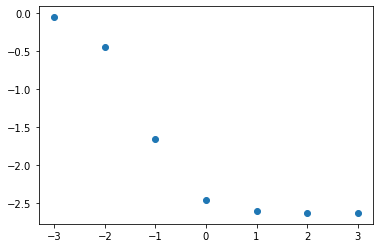

In [203]:
import math

x = [math.log10(i) for i in df.index]
y = df.male
plt.scatter(x, y)

In [215]:
def logit_model_accuracy(c_value, X, y):
    logit = LogisticRegression(C=c_value)
    logit.fit(X, y)
    accuracy = logit.score(X, y)
    return accuracy

In [216]:
logit_model_accuracy(1, X_train, y_train)

0.7907444668008048

In [223]:
list_C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

accuracy_list = [logit_model_accuracy(i, X_train, y_train) for i in list_C]
df = pd.DataFrame(accuracy_list)
df.columns = ['Accuracy']
df.index = list_C
df

,Accuracy
0.001,0.657948
0.010,0.708249
0.100,0.780684
1.000,0.790744
10.000,0.788732
100.000,0.788732
1000.000,0.788732


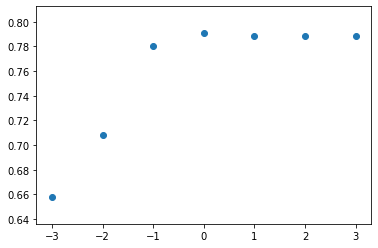

In [224]:
x = [math.log10(i) for i in df.index]
y = df.Accuracy
plt.scatter(x, y)